In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/jimkellypercine/Desktop/FOMC-Sentiment/data/Group1-2 SP500.csv')

cols_to_drop = [col for col in df.columns
                if col.startswith('topic_sentiment_score') and not col.endswith('category')]

base_cols_to_drop = ['date', 'ticker', 'speech_close']

for i in range(1, 6):
    base_cols_to_drop.extend([f'before_{i}_open', f'before_{i}_close'])

for i in range(1, 11):
    base_cols_to_drop.extend([f'after_{i}_open', f'after_{i}_close'])

cols_to_drop.extend(base_cols_to_drop)

df = df.drop(columns=cols_to_drop)

print("Remaining columns:")
print(df.columns.tolist())

print("\nDataframe shape:", df.shape)
print("Number of rows in the dataframe:", len(df))

Remaining columns:
['filename', 'macroeconomic_commentary', 'asset_purchases_balance_sheet', 'financial_conditions_market_functioning', 'timing_operations', 'federal_reserve_agencies', 'word_count', 'overall_sentiment', 'topic_sentiment_score_macroeconomic_commentary_category', 'topic_sentiment_score_asset_purchases_balance_sheet_category', 'topic_sentiment_score_financial_conditions_market_functioning_category', 'topic_sentiment_score_timing_operations_category', 'topic_sentiment_score_federal_reserve_agencies_category', 'monetary_policy', 'federal_reserve', 'inflation', 'federal_fund_rate', 'labor_market', 'target_range', 'stance_monetary_policy', 'maximum_employment_price', 'open_market_committee', 'holding_treasury_security', 'pre_market_movement', 'after_1_day_market', 'momentum_3d_before', 'momentum_5d_after', 'volatility_3d_before', 'volatility_5d_after']

Dataframe shape: (161, 29)
Number of rows in the dataframe: 161


In [2]:
numeric_summary = df.describe()

print("Summary of numerical features:")
display(numeric_summary)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
missing_values = df[numeric_cols].isnull().sum()
print("\nMissing values in numerical columns:")
print(missing_values[missing_values > 0])  # Only show columns with missing values

Summary of numerical features:


,macroeconomic_commentary,asset_purchases_balance_sheet,financial_conditions_market_functioning,timing_operations,federal_reserve_agencies,word_count,overall_sentiment,monetary_policy,federal_reserve,inflation,...,stance_monetary_policy,maximum_employment_price,open_market_committee,holding_treasury_security,pre_market_movement,after_1_day_market,momentum_3d_before,momentum_5d_after,volatility_3d_before,volatility_5d_after
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.00000,161.000000,161.000000,161.000000,...,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,0.245317,0.189232,0.149168,0.110306,0.305976,578.608696,6.78882,1.857143,2.869565,7.186335,...,0.708075,0.236025,1.515528,0.602484,0.000030,-0.001256,-0.000431,0.000669,0.008369,0.009963
std,0.400790,0.337870,0.344226,0.274135,0.429263,289.074670,3.97242,2.507133,4.401889,3.188269,...,0.959425,0.506403,0.895165,1.147168,0.008725,0.015382,0.019300,0.025506,0.009002,0.007376
min,0.000130,0.000151,0.000143,0.000127,0.000130,122.000000,-3.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,-0.028981,-0.057649,-0.110248,-0.084627,0.000341,0.001393
25%,0.000249,0.000254,0.000251,0.000195,0.000227,379.000000,4.00000,0.000000,0.000000,5.000000,...,0.000000,0.000000,1.000000,0.000000,-0.003189,-0.008708,-0.005435,-0.010259,0.003438,0.004967
50%,0.000370,0.000291,0.000281,0.000257,0.000366,599.000000,7.00000,1.000000,0.000000,7.000000,...,0.000000,0.000000,1.000000,0.000000,0.000428,0.000106,0.002661,0.001311,0.006364,0.007796
75%,0.334916,0.285082,0.000437,0.000294,0.687672,839.000000,9.00000,2.000000,8.000000,10.000000,...,1.000000,0.000000,2.000000,1.000000,0.003525,0.006269,0.009317,0.010949,0.010462,0.013101
max,0.999104,0.999431,0.999401,0.998322,0.999027,1190.000000,19.00000,9.000000,12.000000,15.000000,...,3.000000,2.000000,4.000000,6.000000,0.051447,0.090603,0.052061,0.173581,0.092667,0.045359



Missing values in numerical columns:
Series([], dtype: int64)


Number of numerical features: 19
Number of available targets: 4


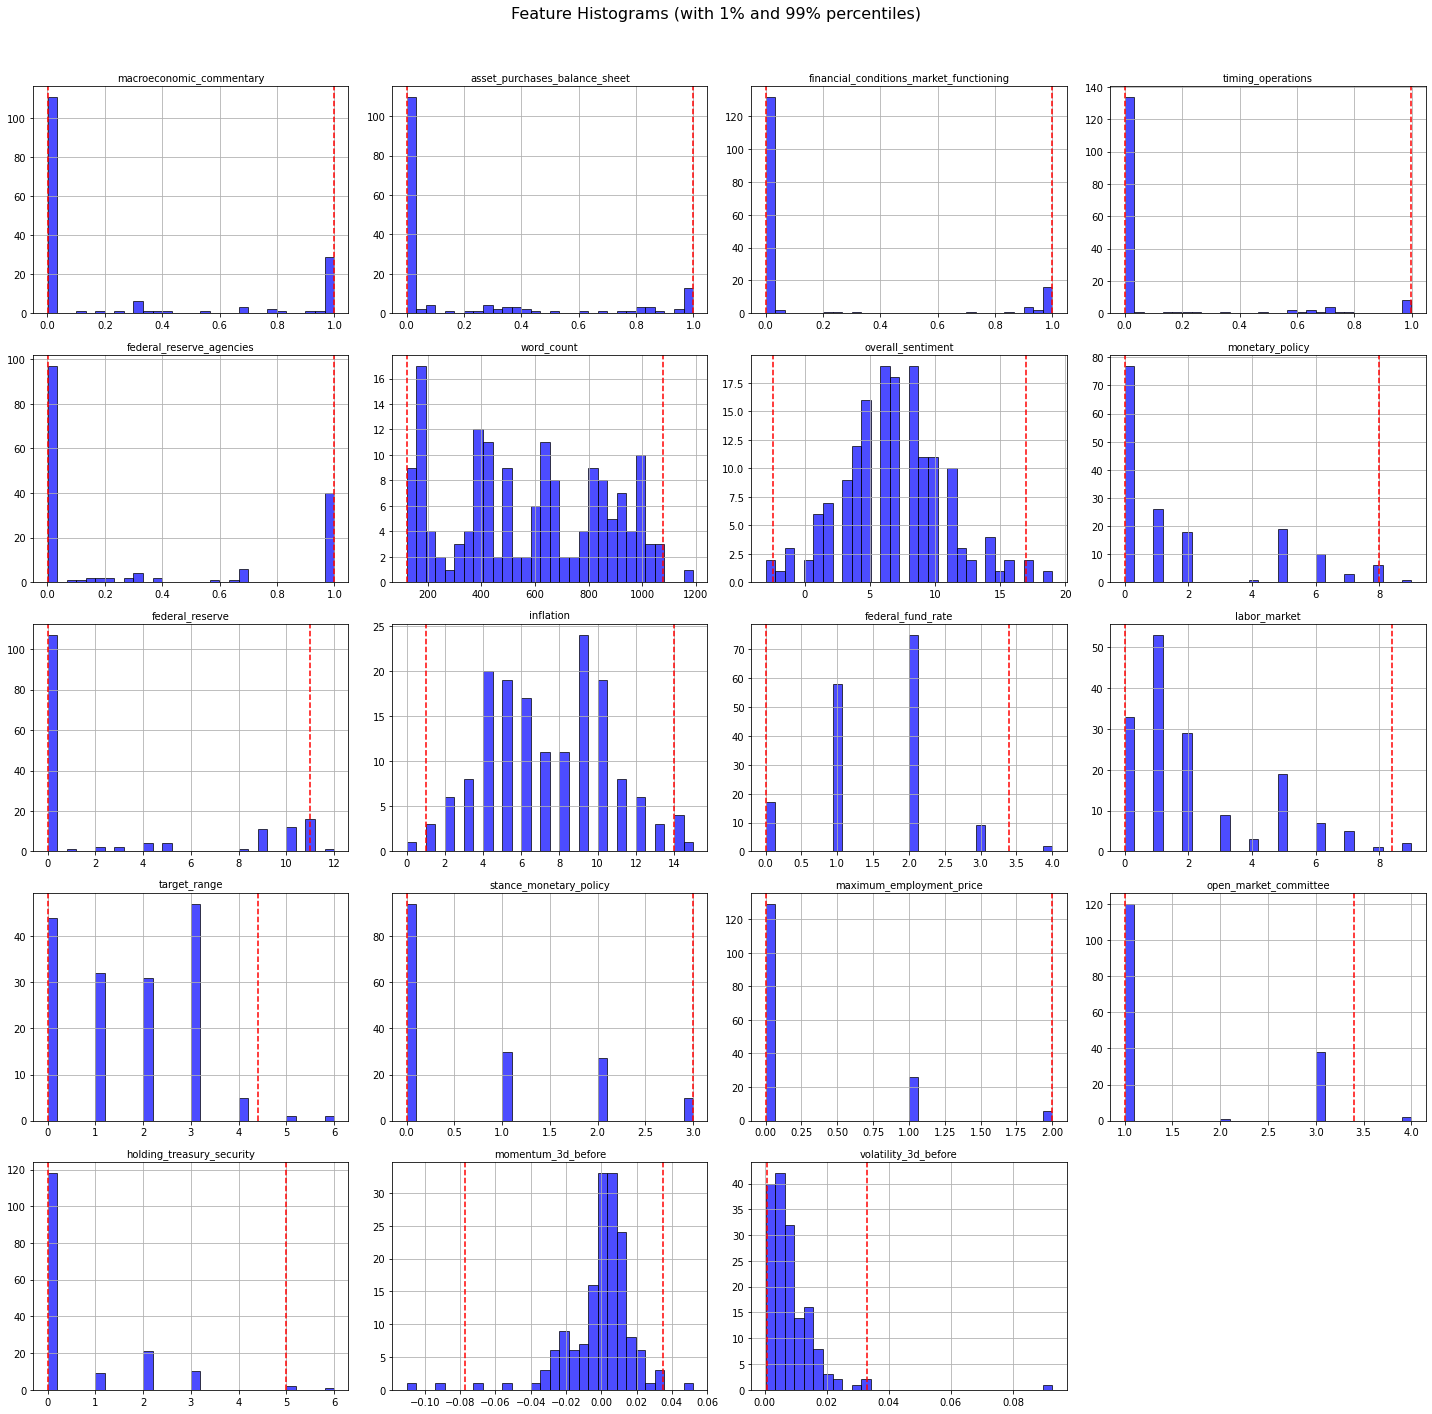

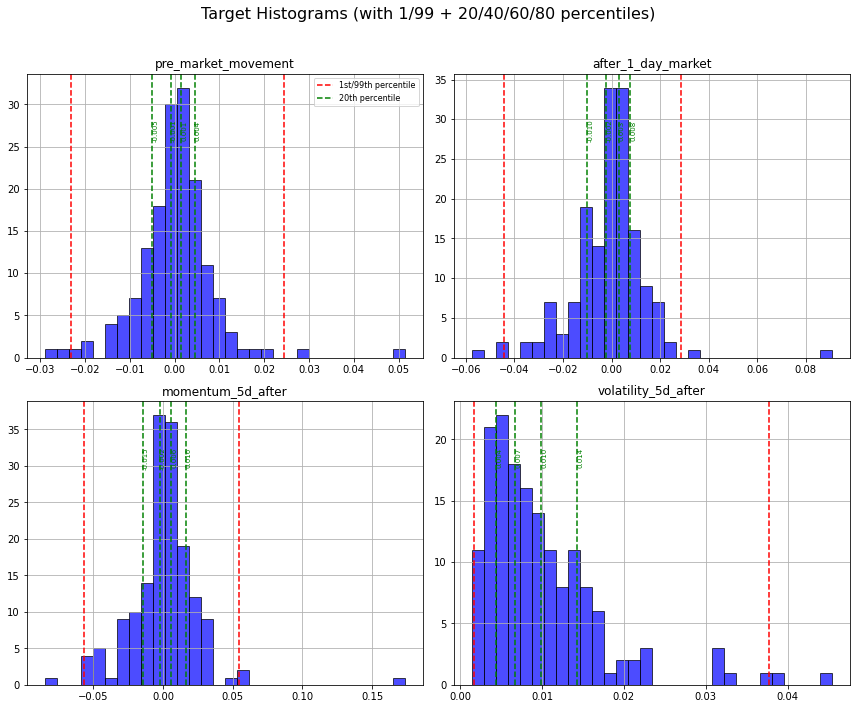

In [3]:
import matplotlib.pyplot as plt
import numpy as np

desired_targets = ['pre_market_movement', 'after_1_day_market', 'momentum_5d_after', 'volatility_5d_after']

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

available_targets = [col for col in desired_targets if col in numerical_cols]
feature_cols = [col for col in numerical_cols if col not in available_targets]

print(f"Number of numerical features: {len(feature_cols)}")
print(f"Number of available targets: {len(available_targets)}")

# ==== PLOT FEATURES ====
n_cols = 4
n_rows = int(np.ceil(len(feature_cols) / n_cols))

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for idx, col in enumerate(feature_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    data = df[col].dropna()

    # Histogram
    plt.hist(data, bins=30, color='blue', alpha=0.7, edgecolor='black')

    # 1% and 99% lines
    p1 = np.percentile(data, 1)
    p99 = np.percentile(data, 99)
    plt.axvline(p1, color='red', linestyle='--')
    plt.axvline(p99, color='red', linestyle='--')

    plt.title(col, fontsize=10)
    plt.grid(True)

plt.suptitle('Feature Histograms (with 1% and 99% percentiles)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Space for title
plt.show()

# ==== PLOT TARGETS ====
n_cols = 2
n_rows = int(np.ceil(len(available_targets) / n_cols))

plt.figure(figsize=(n_cols * 6, n_rows * 5))

for idx, col in enumerate(available_targets, 1):
    plt.subplot(n_rows, n_cols, idx)
    data = df[col].dropna()

    # Histogram
    plt.hist(data, bins=30, color='blue', alpha=0.7, edgecolor='black')

    # 1% and 99% lines
    p1 = np.percentile(data, 1)
    p99 = np.percentile(data, 99)
    plt.axvline(p1, color='red', linestyle='--', label='1st/99th percentile' if idx == 1 else "")
    plt.axvline(p99, color='red', linestyle='--')

    # 20%, 40%, 60%, 80% lines 
    for q in [20, 40, 60, 80]:
        value = np.percentile(data, q)
        plt.axvline(value, color='green', linestyle='--', label=f'{q}th percentile' if idx == 1 and q == 20 else "")
        plt.text(value, plt.ylim()[1]*0.8, f'{value:.3f}', rotation=90,
                 verticalalignment='center', color='green', fontsize=7)

    plt.title(col, fontsize=12)
    plt.grid(True)

    if idx == 1:
        plt.legend(fontsize=8)

plt.suptitle('Target Histograms (with 1/99 + 20/40/60/80 percentiles)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Statistical Summary Analysis
1. Sentiment and Topic Scores
Most topic scores are between 0 and 1, suggesting they're probability/normalized scores
macroeconomic_commentary, asset_purchases_balance_sheet, financial_conditions_market_functioning, and federal_reserve_agencies have similar patterns with some high values near 0.99
timing_operations is notably different, with very small values (mean ~0.0002)
2. Text Analysis Features
word_count: Ranges from 350 to 1190 words, with mean ~746 words
overall_sentiment: Ranges from -2 to 19, with mean ~7
Most documents have positive sentiment (75% of documents have sentiment ≥ 5)
3. Keyword Counts
inflation appears frequently (mean ~8.6 times per document)
federal_reserve mentions vary widely (0-12 times, mean ~4)
monetary_policy appears 0-9 times (mean ~2.6)
4. Market Indicators
pre_market_movement: Small values (-0.024 to 0.051), centered near zero (median 0.00003)
after_1_day_market: Slightly more volatile (-0.058 to 0.091)
Momentum indicators:
momentum_3d_before: Range -0.090 to 0.052
momentum_5d_after: Larger range -0.085 to 0.174
Volatility indicators:
Both volatility_3d_before and volatility_5d_after are always positive
Post-event volatility (volatility_5d_after) tends to be higher than pre-event (volatility_3d_before)
5. Binary/Categorical Features
maximum_employment_price: Binary (0 or 1)
stance_monetary_policy: Takes values 0-3
open_market_committee: Values 1-4
holding_treasury_security: Values 0-6


In [4]:
category_cols = [col for col in df.columns
                if col.startswith('topic_sentiment_score') and col.endswith('category')]

# ordinal mapping
sentiment_mapping = {
    'very poor': 1,
    'poor': 2,
    'neutral': 3,
    'good': 4,
    'very good': 5
}

# new encoded columns
for col in category_cols:
    new_col = col.replace('topic_sentiment_score_', 'encoded_')
    df[new_col] = df[col].map(sentiment_mapping)

for orig_col in category_cols:
    enc_col = orig_col.replace('topic_sentiment_score_', 'encoded_')
    print(f"\nOriginal column '{orig_col}':")
    print("Unique values:", sorted(df[orig_col].unique()))
    print(f"Encoded column '{enc_col}':")
    print("Unique values:", sorted(df[enc_col].unique()))

df = df.drop(columns=category_cols)


Original column 'topic_sentiment_score_macroeconomic_commentary_category':
Unique values: ['good', 'neutral', 'poor', 'very good', 'very poor']
Encoded column 'encoded_macroeconomic_commentary_category':
Unique values: [1, 2, 3, 4, 5]

Original column 'topic_sentiment_score_asset_purchases_balance_sheet_category':
Unique values: ['good', 'neutral', 'poor']
Encoded column 'encoded_asset_purchases_balance_sheet_category':
Unique values: [2, 3, 4]

Original column 'topic_sentiment_score_financial_conditions_market_functioning_category':
Unique values: ['good', 'neutral', 'poor']
Encoded column 'encoded_financial_conditions_market_functioning_category':
Unique values: [2, 3, 4]

Original column 'topic_sentiment_score_timing_operations_category':
Unique values: ['good', 'neutral', 'poor', 'very good', 'very poor']
Encoded column 'encoded_timing_operations_category':
Unique values: [1, 2, 3, 4, 5]

Original column 'topic_sentiment_score_federal_reserve_agencies_category':
Unique values: ['g

We can see that the timing_operations column has all "neutral" values, so it's pretty useless. We will drop it.

In [5]:
timing_cols = [col for col in df.columns if 'timing_operations' in col]
print("Columns to be dropped:", timing_cols)

df = df.drop(columns=timing_cols)

print("\nNew dataframe shape:", df.shape)

print("\nRemaining columns:")
print(df.columns.tolist())

Columns to be dropped: ['timing_operations', 'encoded_timing_operations_category']

New dataframe shape: (161, 27)

Remaining columns:
['filename', 'macroeconomic_commentary', 'asset_purchases_balance_sheet', 'financial_conditions_market_functioning', 'federal_reserve_agencies', 'word_count', 'overall_sentiment', 'monetary_policy', 'federal_reserve', 'inflation', 'federal_fund_rate', 'labor_market', 'target_range', 'stance_monetary_policy', 'maximum_employment_price', 'open_market_committee', 'holding_treasury_security', 'pre_market_movement', 'after_1_day_market', 'momentum_3d_before', 'momentum_5d_after', 'volatility_3d_before', 'volatility_5d_after', 'encoded_macroeconomic_commentary_category', 'encoded_asset_purchases_balance_sheet_category', 'encoded_financial_conditions_market_functioning_category', 'encoded_federal_reserve_agencies_category']


In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

df_raw = df.copy()  
df_features = df_raw.copy()  

targets_to_remove = ['pre_market_movement', 'after_1_day_market',
                     'momentum_5d_after', 'volatility_5d_after']

df_targets = df_features[targets_to_remove].copy()

df_features = df_features.drop(columns=targets_to_remove)

# numerical columns for VIF calculation
numerical_cols = df_features.select_dtypes(include=[np.number]).columns

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_cols
vif_data["VIF"] = [variance_inflation_factor(df_features[numerical_cols].values, i)
                   for i in range(df_features[numerical_cols].shape[1])]

# Sort by VIF value
vif_data = vif_data.sort_values('VIF', ascending=False)

print("Variance Inflation Factors:\n")
print("Features with VIF > 5 (Potential multicollinearity issues):")
print("-" * 60)
high_vif = vif_data[vif_data['VIF'] > 5].round(2)
if len(high_vif) > 0:
    print(high_vif.to_string(index=False))
else:
    print("No features with VIF > 5 found.")

print("\nFeatures with moderate VIF (2-5):")
print("-" * 60)
moderate_vif = vif_data[(vif_data['VIF'] <= 5) & (vif_data['VIF'] > 2)].round(2)
if len(moderate_vif) > 0:
    print(moderate_vif.to_string(index=False))
else:
    print("No features with moderate VIF found.")

print("\nFeatures with low VIF (< 5):")
print("-" * 60)
low_vif = vif_data[vif_data['VIF'] <= 5].round(2)
if len(low_vif) > 0:
    print(low_vif.to_string(index=False))
else:
    print("No features with low VIF found.")


Variance Inflation Factors:

Features with VIF > 5 (Potential multicollinearity issues):
------------------------------------------------------------
                                                 Feature    VIF
                                              word_count 104.67
                                   open_market_committee  71.78
                                         federal_reserve  71.08
encoded_financial_conditions_market_functioning_category  64.66
          encoded_asset_purchases_balance_sheet_category  36.93
                                               inflation  36.14
                                         monetary_policy  26.18
               encoded_federal_reserve_agencies_category  25.61
                                            labor_market  16.50
                 financial_conditions_market_functioning  16.13
                                            target_range  14.40
                           asset_purchases_balance_sheet  13.96
                  

This VIF isn't acceptable and will make coefficients unstable. So we need to use either Ridge or Lasso for linear relationships. Or use PCA to reduce feature space. For nonlinear models, this might not be a problem.

In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import LeaveOneOut, train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, f1_score
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

alphas_coarse = np.logspace(-4, 3, 20)
alphas_fine_factor = 3  
Cs_coarse = np.logspace(-3, 3, 20)  # For Logistic Regression

targets = {
    'pre_market_movement': 'market_movement',
    'after_1_day_market': 'market_movement',
    'momentum_5d_after': 'momentum',
    'volatility_5d_after': 'volatility'
}

targets_to_remove = list(targets.keys())
df_targets = df[targets_to_remove].copy()
df_features_full = df.drop(columns=targets_to_remove + ['filename'])

results_summary = {}

for target_col, target_type in targets.items():
    print(f"\n=== Processing Target: {target_col} ===")

    X = df_features_full.copy()
    y = df_targets[target_col]

    # Categorize target
    if target_type == 'market_movement':
        conditions = [(y < -0.005), (y >= -0.005) & (y <= 0.005), (y > 0.005)]
        values = ['bad', 'neutral', 'good']
    elif target_type == 'momentum':
        conditions = [(y < -0.01), (y >= -0.01) & (y <= 0.01), (y > 0.01)]
        values = ['bad', 'neutral', 'good']
    else:
        conditions = [(y < 0.005), (y >= 0.005) & (y <= 0.01), (y > 0.01)]
        values = ['good', 'neutral', 'bad']

    y_categorized = np.select(conditions, values, default='neutral')
    le = LabelEncoder()
    y_encoded = le.fit_transform(y_categorized)

    # Split Train/Test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded, test_size=0.4, random_state=42, stratify=y_encoded)

    print("Training Set Class Balance:")
    print(pd.Series(le.inverse_transform(y_train)).value_counts())

    # Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # === Feature selection: Top 10 using f_classif (better than correlation for multiclass)
    selector = SelectKBest(score_func=f_classif, k=10)
    X_train_top10 = selector.fit_transform(X_train_scaled, y_train)
    X_test_top10 = selector.transform(X_test_scaled)

    # === Polynomial features (on all features)
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    # === Logistic Regression (Top 10) - with C tuning ===
    logreg_base = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
    grid_logreg = GridSearchCV(logreg_base, {'C': Cs_coarse},
                               cv=StratifiedKFold(5, shuffle=True, random_state=42),
                               scoring='f1_weighted', n_jobs=-1)
    grid_logreg.fit(X_train_top10, y_train)
    best_logreg = grid_logreg.best_estimator_

    loo = LeaveOneOut()
    acc_logreg = cross_val_score(best_logreg, X_train_top10, y_train, cv=loo, scoring='accuracy').mean()
    f1_logreg = cross_val_score(best_logreg, X_train_top10, y_train, cv=loo, scoring='f1_weighted').mean()

    best_logreg.fit(X_train_top10, y_train)
    test_acc_logreg = accuracy_score(y_test, best_logreg.predict(X_test_top10))
    test_f1_logreg = f1_score(y_test, best_logreg.predict(X_test_top10), average='weighted')

    # === Ridge All Features (Tuned, 2-stage search) ===
    ridge_all = RidgeClassifier()
    grid_all = GridSearchCV(ridge_all, {'alpha': alphas_coarse},
                            cv=StratifiedKFold(5, shuffle=True, random_state=42),
                            scoring='f1_weighted', n_jobs=-1)
    grid_all.fit(X_train_scaled, y_train)
    best_alpha_all = grid_all.best_params_['alpha']

    # Fine search around best
    fine_grid_all = np.linspace(best_alpha_all / alphas_fine_factor, best_alpha_all * alphas_fine_factor, 20)
    grid_all_fine = GridSearchCV(RidgeClassifier(), {'alpha': fine_grid_all},
                                 cv=StratifiedKFold(5, shuffle=True, random_state=42),
                                 scoring='f1_weighted', n_jobs=-1)
    grid_all_fine.fit(X_train_scaled, y_train)
    best_ridge_all = grid_all_fine.best_estimator_

    loo_ridge_all_acc = cross_val_score(best_ridge_all, X_train_scaled, y_train, cv=loo, scoring='accuracy').mean()
    loo_ridge_all_f1 = cross_val_score(best_ridge_all, X_train_scaled, y_train, cv=loo, scoring='f1_weighted').mean()

    best_ridge_all.fit(X_train_scaled, y_train)
    test_acc_ridge_all = accuracy_score(y_test, best_ridge_all.predict(X_test_scaled))
    test_f1_ridge_all = f1_score(y_test, best_ridge_all.predict(X_test_scaled), average='weighted')

    # === Ridge Poly Features (Tuned, 2-stage search) ===
    ridge_poly = RidgeClassifier()
    grid_poly = GridSearchCV(ridge_poly, {'alpha': alphas_coarse},
                             cv=StratifiedKFold(5, shuffle=True, random_state=42),
                             scoring='f1_weighted', n_jobs=-1)
    grid_poly.fit(X_train_poly, y_train)
    best_alpha_poly = grid_poly.best_params_['alpha']

    fine_grid_poly = np.linspace(best_alpha_poly / alphas_fine_factor, best_alpha_poly * alphas_fine_factor, 20)
    grid_poly_fine = GridSearchCV(RidgeClassifier(), {'alpha': fine_grid_poly},
                                  cv=StratifiedKFold(5, shuffle=True, random_state=42),
                                  scoring='f1_weighted', n_jobs=-1)
    grid_poly_fine.fit(X_train_poly, y_train)
    best_ridge_poly = grid_poly_fine.best_estimator_

    loo_ridge_poly_acc = cross_val_score(best_ridge_poly, X_train_poly, y_train, cv=loo, scoring='accuracy').mean()
    loo_ridge_poly_f1 = cross_val_score(best_ridge_poly, X_train_poly, y_train, cv=loo, scoring='f1_weighted').mean()

    best_ridge_poly.fit(X_train_poly, y_train)
    test_acc_ridge_poly = accuracy_score(y_test, best_ridge_poly.predict(X_test_poly))
    test_f1_ridge_poly = f1_score(y_test, best_ridge_poly.predict(X_test_poly), average='weighted')

    # === Save Results ===
    results_summary[target_col] = {
        'LogReg_Top10_C': grid_logreg.best_params_['C'],
        'LogReg_Top10_TrainAcc': round(acc_logreg, 3),
        'LogReg_Top10_TrainF1': round(f1_logreg, 3),
        'LogReg_Top10_TestAcc': round(test_acc_logreg, 3),
        'LogReg_Top10_TestF1': round(test_f1_logreg, 3),

        'Ridge_All_BestAlpha': round(grid_all_fine.best_params_['alpha'], 5),
        'Ridge_All_TrainAcc': round(loo_ridge_all_acc, 3),
        'Ridge_All_TrainF1': round(loo_ridge_all_f1, 3),
        'Ridge_All_TestAcc': round(test_acc_ridge_all, 3),
        'Ridge_All_TestF1': round(test_f1_ridge_all, 3),

        'Ridge_Poly_BestAlpha': round(grid_poly_fine.best_params_['alpha'], 5),
        'Ridge_Poly_TrainAcc': round(loo_ridge_poly_acc, 3),
        'Ridge_Poly_TrainF1': round(loo_ridge_poly_f1, 3),
        'Ridge_Poly_TestAcc': round(test_acc_ridge_poly, 3),
        'Ridge_Poly_TestF1': round(test_f1_ridge_poly, 3)
    }

# === FINAL ===
summary_df = pd.DataFrame(results_summary).T
print("\n=== Final Summary ===")
print(summary_df)


=== Processing Target: pre_market_movement ===
Training Set Class Balance:
neutral    60
bad        19
good       17
dtype: int64

=== Processing Target: after_1_day_market ===
Training Set Class Balance:
neutral    37
good       30
bad        29
dtype: int64

=== Processing Target: momentum_5d_after ===
Training Set Class Balance:
neutral    45
good       27
bad        24
dtype: int64

=== Processing Target: volatility_5d_after ===
Training Set Class Balance:
bad        38
neutral    33
good       25
dtype: int64

=== Final Summary ===
                     LogReg_Top10_C  LogReg_Top10_TrainAcc  \
pre_market_movement        0.162378                  0.615   
after_1_day_market        54.555948                  0.469   
momentum_5d_after          0.008859                  0.448   
volatility_5d_after       54.555948                  0.594   

                     LogReg_Top10_TrainF1  LogReg_Top10_TestAcc  \
pre_market_movement                 0.615                 0.600   
after_1_day

In [8]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, LeaveOneOut, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import warnings

warnings.filterwarnings('ignore')

# ============== SETTINGS ==============

param_grids = {
    'rf': {'n_estimators': [100,150, 200,250], 'max_depth': [3, 5, 7 , 9, 11]},
    'gb': {'n_estimators': [100,150, 200,250], 'learning_rate': [0.2, 0.1, 0.05, 0.01], 'max_depth': [3, 5, 7 , 9, 11]},
    'knn': {'n_neighbors': [3, 5, 7,9]}
}

models_map = {
    'rf': RandomForestClassifier(random_state=42),
    'gb': GradientBoostingClassifier(random_state=42),
    'knn': KNeighborsClassifier()
}

# ============== PREPARE FEATURES AND TARGETS (same as Ridge section) ==============

# Define targets
targets_to_remove = ['pre_market_movement', 'after_1_day_market', 'momentum_5d_after', 'volatility_5d_after']

df_features_full = df.drop(columns=targets_to_remove + ['filename'])
df_targets = df[targets_to_remove].copy()

targets_mapping = {
    'pre_market_movement': 'market_movement',
    'after_1_day_market': 'market_movement',
    'momentum_5d_after': 'momentum',
    'volatility_5d_after': 'volatility'
}


def preprocess_and_train_general(X, y_raw, target_type, model_type):
    df_proc = X.copy()
    y = y_raw.copy()

    # Remove Outliers in y
    lower_bound = np.percentile(y, 1)
    upper_bound = np.percentile(y, 99)
    mask = (y >= lower_bound) & (y <= upper_bound)
    df_proc = df_proc.loc[mask]
    y = y.loc[mask]

    # Target Categorization
    if target_type == 'market_movement':
        conditions = [(y < -0.005), (y >= -0.005) & (y <= 0.005), (y > 0.005)]
        values = ['bad', 'neutral', 'good']
    elif target_type == 'momentum':
        conditions = [(y < -0.01), (y >= -0.01) & (y <= 0.01), (y > 0.01)]
        values = ['bad', 'neutral', 'good']
    else:  # volatility
        conditions = [(y < 0.005), (y >= 0.005) & (y <= 0.01), (y > 0.01)]
        values = ['good', 'neutral', 'bad']

    y_categorized = np.select(conditions, values, default='neutral')

    # Scale only if KNN (distance-based)
    if model_type == 'knn':
        scaler = StandardScaler()
        X_proc = scaler.fit_transform(df_proc)
    else:
        X_proc = df_proc.values  # no scaling for tree models

    # Encode Target
    le = LabelEncoder()
    y_encoded = le.fit_transform(y_categorized)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_proc, y_encoded, test_size=0.4, random_state=42, stratify=y_encoded
    )

    # Grid Search
    model_base = models_map[model_type]
    grid = GridSearchCV(model_base, param_grids[model_type],
                        cv=StratifiedKFold(5, shuffle=True, random_state=42),
                        scoring='f1_weighted', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_

    # LOOCV on Training Set
    loo = LeaveOneOut()
    loo_acc = cross_val_score(best_model, X_train, y_train, cv=loo, scoring='accuracy').mean()
    loo_f1 = cross_val_score(best_model, X_train, y_train, cv=loo, scoring='f1_weighted').mean()

    # Test Set
    best_model.fit(X_train, y_train)
    y_pred_test = best_model.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')

    # Feature importances (for RF/GB only)
    if model_type in ['rf', 'gb']:
        feature_importance = pd.DataFrame({
            'Feature': df_proc.columns,
            'Importance': best_model.feature_importances_
        }).sort_values('Importance', ascending=False)
    else:
        feature_importance = None

    # Full classification report
    class_report = classification_report(y_test, y_pred_test, target_names=le.classes_, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred_test)

    return {
        'best_params': grid.best_params_,
        'train_LOOCV_acc': loo_acc,
        'train_LOOCV_f1': loo_f1,
        'test_acc': test_acc,
        'test_f1': test_f1,
        'feature_importance': feature_importance,
        'classification_report': class_report,
        'confusion_matrix': conf_matrix,
        'class_balance': pd.Series(le.inverse_transform(y_train)).value_counts()
    }


all_results = {}

for model_type in models_map.keys():
    print(f"\n====== Model: {model_type.upper()} ======")
    model_results = {}

    for target_col, target_type in targets_mapping.items():
        print(f"\nProcessing {target_col}")
        print("=" * 60)

        X = df_features_full.copy()
        y = df_targets[target_col].copy()

        res = preprocess_and_train_general(X, y, target_type, model_type)

        model_results[target_col] = res

        print("Training Set Class Balance:")
        print(res['class_balance'])

        print(f"\nBest Params: {res['best_params']}")
        print(f"LOOCV Train Accuracy: {res['train_LOOCV_acc']:.3f}")
        print(f"LOOCV Train F1: {res['train_LOOCV_f1']:.3f}")
        print(f"Test Accuracy: {res['test_acc']:.3f}")
        print(f"Test F1: {res['test_f1']:.3f}")

        print("\nClassification Report (Test Set):")
        for label, scores in res['classification_report'].items():
            if label in ['good', 'neutral', 'bad']:
                print(f"{label}: Precision={scores['precision']:.3f}, Recall={scores['recall']:.3f}, F1={scores['f1-score']:.3f}")

        print("\nConfusion Matrix (Test Set):")
        print(res['confusion_matrix'])

        if res['feature_importance'] is not None:
            print("\nTop 10 Important Features:")
            print(res['feature_importance'].head(10))

        print("\n" + "=" * 80)

    all_results[model_type] = model_results
    
    # Export results to a text file
    with open("model_results_summary.txt", "w") as file:
        for model_type, model_results in all_results.items():
            file.write(f"\n====== Model: {model_type.upper()} ======\n")
            for target_col, res in model_results.items():
                file.write(f"\nTarget: {target_col}\n")
                file.write("=" * 60 + "\n")
                file.write(f"Best Params: {res['best_params']}\n")
                file.write(f"LOOCV Train Accuracy: {res['train_LOOCV_acc']:.3f}\n")
                file.write(f"LOOCV Train F1: {res['train_LOOCV_f1']:.3f}\n")
                file.write(f"Test Accuracy: {res['test_acc']:.3f}\n")
                file.write(f"Test F1: {res['test_f1']:.3f}\n")
                file.write("\nClassification Report (Test Set):\n")
                for label, scores in res['classification_report'].items():
                    if label in ['good', 'neutral', 'bad']:
                        file.write(f"{label}: Precision={scores['precision']:.3f}, Recall={scores['recall']:.3f}, F1={scores['f1-score']:.3f}\n")
                file.write("\nConfusion Matrix (Test Set):\n")
                file.write(f"{res['confusion_matrix']}\n")
                if res['feature_importance'] is not None:
                    file.write("\nTop 10 Important Features:\n")
                    file.write(res['feature_importance'].head(10).to_string(index=False))
                    file.write("\n")
                file.write("\n" + "=" * 80 + "\n")



====== Model: RF ======

Processing pre_market_movement
Training Set Class Balance:
neutral    60
bad        18
good       16
dtype: int64

Best Params: {'max_depth': 7, 'n_estimators': 100}
LOOCV Train Accuracy: 0.606
LOOCV Train F1: 0.606
Test Accuracy: 0.651
Test F1: 0.608

Classification Report (Test Set):
bad: Precision=0.667, Recall=0.333, F1=0.444
good: Precision=0.167, Recall=0.091, F1=0.118
neutral: Precision=0.706, Recall=0.900, F1=0.791

Confusion Matrix (Test Set):
[[ 4  1  7]
 [ 2  1  8]
 [ 0  4 36]]

Top 10 Important Features:
                                      Feature  Importance
17                       volatility_3d_before    0.129536
16                         momentum_3d_before    0.108265
2     financial_conditions_market_functioning    0.094995
1               asset_purchases_balance_sheet    0.091589
0                    macroeconomic_commentary    0.078214
4                                  word_count    0.078066
3                    federal_reserve_agencies 


=== Processing Target: pre_market_movement ===
Simple Majority Ensemble Test Acc: 0.569, F1: 0.562
Weighted Voting Ensemble Test Acc: 0.615, F1: 0.600
Stacked Model Ensemble Test Acc: 0.462, F1: 0.476
LOOCV Weighted Voting Train Acc: 0.438, F1: 0.412

=== Processing Target: after_1_day_market ===
Simple Majority Ensemble Test Acc: 0.369, F1: 0.345
Weighted Voting Ensemble Test Acc: 0.385, F1: 0.352
Stacked Model Ensemble Test Acc: 0.354, F1: 0.348
LOOCV Weighted Voting Train Acc: 0.354, F1: 0.337

=== Processing Target: momentum_5d_after ===
Simple Majority Ensemble Test Acc: 0.385, F1: 0.381
Weighted Voting Ensemble Test Acc: 0.385, F1: 0.375
Stacked Model Ensemble Test Acc: 0.262, F1: 0.248
LOOCV Weighted Voting Train Acc: 0.406, F1: 0.397

=== Processing Target: volatility_5d_after ===
Simple Majority Ensemble Test Acc: 0.523, F1: 0.526
Weighted Voting Ensemble Test Acc: 0.508, F1: 0.518
Stacked Model Ensemble Test Acc: 0.492, F1: 0.496
LOOCV Weighted Voting Train Acc: 0.573, F1: 0

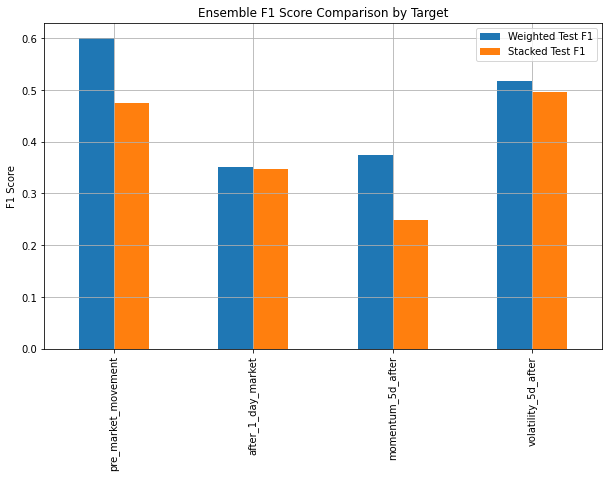

In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.metrics import accuracy_score, f1_score
from sklearn.base import clone
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# ============== SETTINGS ==============

# Define your targets
targets = {
    'pre_market_movement': 'market_movement',
    'after_1_day_market': 'market_movement',
    'momentum_5d_after': 'momentum',
    'volatility_5d_after': 'volatility'
}

ridge_all_best_alpha = {
    'pre_market_movement': 86.82540, 
    'after_1_day_market': 262.88883,
    'momentum_5d_after': 34.77707, 
    'volatility_5d_after': 2.35911
}
ridge_poly_best_alpha = {
    'pre_market_movement': 563.33321, 
    'after_1_day_market': 0.85158,
    'momentum_5d_after': 0.87888, 
    'volatility_5d_after': 292.63376
}

rf_best_params = {
    'pre_market_movement': {'n_estimators': 100, 'max_depth': 7},
    'after_1_day_market': {'n_estimators': 100, 'max_depth': 9},
    'momentum_5d_after': {'n_estimators': 100, 'max_depth': 5},
    'volatility_5d_after': {'n_estimators': 250, 'max_depth': 5}
}
gb_best_params = {
    'pre_market_movement': {'n_estimators': 100, 'learning_rate': 0.2, 'max_depth': 5},
    'after_1_day_market': {'n_estimators': 150, 'learning_rate': 0.1, 'max_depth': 5},
    'momentum_5d_after': {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 5},
    'volatility_5d_after': {'n_estimators': 100, 'learning_rate': 0.2, 'max_depth': 5}
}
knn_best_params = {
    'pre_market_movement': {'n_neighbors': 5},
    'after_1_day_market': {'n_neighbors': 9},
    'momentum_5d_after': {'n_neighbors': 9},
    'volatility_5d_after': {'n_neighbors': 3}
}

# Model weights for voting 
model_weights = {
    'logreg': 1.4,
    'ridge_all': 1.35,
    'ridge_poly': 1.35,
    'rf': 1.5,
    'gb': 1.4,
    'knn': 1.4
}

# ============== HELPER FUNCTIONS ==============

def weighted_vote(predictions_array, model_weight_dict, class_count):
    weighted_votes = np.zeros((predictions_array.shape[0], class_count))
    for i, model_name in enumerate(model_weight_dict.keys()):
        preds = predictions_array[:, i]
        for j, pred_class in enumerate(preds):
            weighted_votes[j, pred_class] += model_weight_dict[model_name]
    return np.argmax(weighted_votes, axis=1)


ensemble_results = {}

for target_col, target_type in targets.items():
    print(f"\n=== Processing Target: {target_col} ===")

    # Prepare features and targets
    X = df_features_full.copy()
    y = df_targets[target_col]

    # Categorize target
    if target_type == 'market_movement':
        conditions = [(y < -0.005), (y >= -0.005) & (y <= 0.005), (y > 0.005)]
        values = ['bad', 'neutral', 'good']
    elif target_type == 'momentum':
        conditions = [(y < -0.01), (y >= -0.01) & (y <= 0.01), (y > 0.01)]
        values = ['bad', 'neutral', 'good']
    else:
        conditions = [(y < 0.005), (y >= 0.005) & (y <= 0.01), (y > 0.01)]
        values = ['good', 'neutral', 'bad']

    y_categorized = np.select(conditions, values, default='neutral')
    le = LabelEncoder()
    y_encoded = le.fit_transform(y_categorized)
    class_names = le.classes_

    # Train/Test split
    X_train_raw, X_test_raw, y_train, y_test = train_test_split(
        X, y_encoded, test_size=0.4, random_state=42, stratify=y_encoded)

    # === Feature processing
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_raw)
    X_test_scaled = scaler.transform(X_test_raw)

    # Top 10 features for Logistic Regression
    correlations = []
    for i in range(X_train_scaled.shape[1]):
        if np.std(X_train_scaled[:, i]) > 1e-6:
            corr = np.corrcoef(X_train_scaled[:, i], y_train)[0, 1]
            correlations.append(corr if not np.isnan(corr) else 0)
        else:
            correlations.append(0)
    top_features_idx = np.argsort(np.abs(correlations))[-10:]
    X_train_top10 = X_train_scaled[:, top_features_idx]
    X_test_top10 = X_test_scaled[:, top_features_idx]

    # Polynomial Features for RidgePoly
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    # === Base models ()
    models = {
        'logreg': LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', class_weight='balanced'),
        'ridge_all': RidgeClassifier(alpha=ridge_all_best_alpha[target_col], class_weight='balanced'),
        'ridge_poly': RidgeClassifier(alpha=ridge_poly_best_alpha[target_col], class_weight='balanced'),
        'rf': RandomForestClassifier(**rf_best_params[target_col], random_state=42, class_weight='balanced'),
        'gb': GradientBoostingClassifier(**gb_best_params[target_col], random_state=42),
        'knn': KNeighborsClassifier(**knn_best_params[target_col])
    }

    train_feature_sets = {
        'logreg': X_train_top10,
        'ridge_all': X_train_scaled,
        'ridge_poly': X_train_poly,
        'rf': X_train_scaled,
        'gb': X_train_scaled,
        'knn': X_train_scaled
    }

    test_feature_sets = {
        'logreg': X_test_top10,
        'ridge_all': X_test_scaled,
        'ridge_poly': X_test_poly,
        'rf': X_test_scaled,
        'gb': X_test_scaled,
        'knn': X_test_scaled
    }

    # Train all models
    for name, model in models.items():
        model.fit(train_feature_sets[name], y_train)

    # Simple Voting Ensemble on Test Set
    y_preds_test = np.column_stack([
        models[name].predict(test_feature_sets[name]) for name in models
    ])
    y_pred_majority_test = np.apply_along_axis(lambda x: np.bincount(x).argmax(), 1, y_preds_test)
    y_pred_weighted_test = weighted_vote(y_preds_test, model_weights, len(class_names))

    # LOOCV Ensemble on Training Set
    loo = LeaveOneOut()
    y_true_loo = []
    y_pred_loo = []
    val_preds_stack = []

    for train_idx, val_idx in loo.split(X_train_raw):
        Xtr_raw = X_train_raw.iloc[train_idx]
        Xv_raw = X_train_raw.iloc[val_idx]
        ytr = y_train[train_idx]

        scaler_loo = StandardScaler()
        Xtr_scaled = scaler_loo.fit_transform(Xtr_raw)
        Xv_scaled = scaler_loo.transform(Xv_raw)

        Xtr_top10 = Xtr_scaled[:, top_features_idx]
        Xv_top10 = Xv_scaled[:, top_features_idx]
        Xtr_poly = poly.fit_transform(Xtr_scaled)
        Xv_poly = poly.transform(Xv_scaled)

        local_models = {
            'logreg': clone(models['logreg']).fit(Xtr_top10, ytr),
            'ridge_all': clone(models['ridge_all']).fit(Xtr_scaled, ytr),
            'ridge_poly': clone(models['ridge_poly']).fit(Xtr_poly, ytr),
            'rf': clone(models['rf']).fit(Xtr_scaled, ytr),
            'gb': clone(models['gb']).fit(Xtr_scaled, ytr),
            'knn': clone(models['knn']).fit(Xtr_scaled, ytr)
        }

        preds = np.array([
            local_models['logreg'].predict(Xv_top10)[0],
            local_models['ridge_all'].predict(Xv_scaled)[0],
            local_models['ridge_poly'].predict(Xv_poly)[0],
            local_models['rf'].predict(Xv_scaled)[0],
            local_models['gb'].predict(Xv_scaled)[0],
            local_models['knn'].predict(Xv_scaled)[0]
        ])

        val_preds_stack.append(preds)

        votes = np.zeros(len(class_names))
        for i, p in enumerate(preds):
            votes[p] += model_weights[list(local_models.keys())[i]]
        y_pred_final = np.argmax(votes)

        y_true_loo.append(y_train[val_idx][0])
        y_pred_loo.append(y_pred_final)

    # Build Stacked Model
    val_preds_stack = np.array(val_preds_stack)
    stack_model = LogisticRegression(max_iter=1000, class_weight='balanced')
    stack_model.fit(val_preds_stack, y_true_loo)

    # Predict with Stacked Model
    y_preds_stack_test = np.column_stack([
        models[name].predict(test_feature_sets[name]) for name in models
    ])
    y_pred_stack_test = stack_model.predict(y_preds_stack_test)

    # Evaluate
    acc_majority = accuracy_score(y_test, y_pred_majority_test)
    f1_majority = f1_score(y_test, y_pred_majority_test, average='weighted')
    acc_weighted = accuracy_score(y_test, y_pred_weighted_test)
    f1_weighted = f1_score(y_test, y_pred_weighted_test, average='weighted')
    acc_stack = accuracy_score(y_test, y_pred_stack_test)
    f1_stack = f1_score(y_test, y_pred_stack_test, average='weighted')
    acc_loo = accuracy_score(y_true_loo, y_pred_loo)
    f1_loo = f1_score(y_true_loo, y_pred_loo, average='weighted')

    print(f"Simple Majority Ensemble Test Acc: {acc_majority:.3f}, F1: {f1_majority:.3f}")
    print(f"Weighted Voting Ensemble Test Acc: {acc_weighted:.3f}, F1: {f1_weighted:.3f}")
    print(f"Stacked Model Ensemble Test Acc: {acc_stack:.3f}, F1: {f1_stack:.3f}")
    print(f"LOOCV Weighted Voting Train Acc: {acc_loo:.3f}, F1: {f1_loo:.3f}")

    ensemble_results[target_col] = {
        'Majority Test Acc': acc_majority,
        'Majority Test F1': f1_majority,
        'Weighted Test Acc': acc_weighted,
        'Weighted Test F1': f1_weighted,
        'Stacked Test Acc': acc_stack,
        'Stacked Test F1': f1_stack,
        'Weighted LOOCV Train Acc': acc_loo,
        'Weighted LOOCV Train F1': f1_loo
    }

# ============== FINAL RESULTS ==============

ensemble_summary = pd.DataFrame(ensemble_results).T
print("\n=== Final Ensemble Summary ===")
print(ensemble_summary)

ensemble_summary.to_csv('ensemble_summary.csv', index=True)

ensemble_summary[['Weighted Test F1', 'Stacked Test F1']].plot(kind='bar', figsize=(10,6))
plt.title('Ensemble F1 Score Comparison by Target')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()
